# Feature normalization: min-max scaling

Data normalization also known as feature scaling is a method used to bring values measured in a different scale to another scale. I like to think as a translation of ranges.

Let me give you some examples. I work as a software engineer and is not rare that I have to build progress bars, for example when a user uploads a file how can I convert a range that is measured in bytes, for example, let's say that a given file has 320KB, how do I translate the range from 0 to 320KB (fully uploaded) to a range of 0 - 100% that I could use to control the width of a progress bar?

One other situation in that I also use feature scaling is when I used to develop games. Some games show a 2d map indicating where the player is, but the scale of this mini-map is much smaller than the actual map where the player is moving. How do I translate these positions?

Yep. Data normalization. There are many feature normalization methods. In this notebook, I'll show the min-max where I'll bring all values into the range from 0 to 1. When this is the case this process is also called unity-based normalization. Here is the formula:

# $$ x_i = \frac{x_i - \text{min}(x)}{\text{max}(x)-\text{min}(x)} $$

The steps are:
- Subtract every data point from the minimum value of the dataset
- Divide by the dataset range

Let's use the same example of the file (320KB size) and the progress bar size.

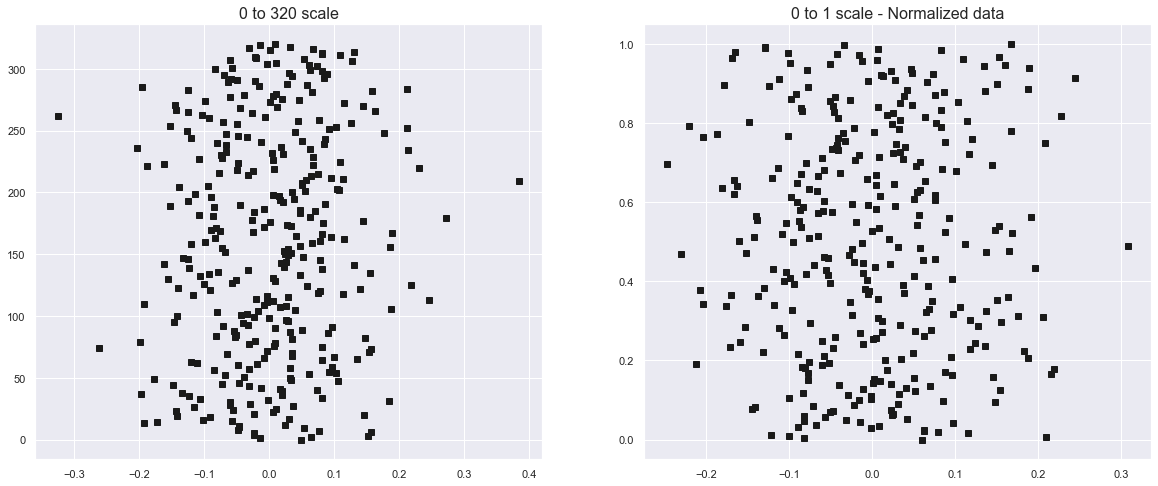

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()
np.random.seed(42)

# Let's create a dataset that simulates the upload progress of this file from 0 to 320KB (fully uploaded)
upload_progress = np.arange(321)

min_x = np.min(upload_progress)
max_x = np.max(upload_progress)

# Now we can use the min-max to translate the range 0 - 320 to 0 - 1
upload_progress_normalized = (upload_progress - min_x) / (max_x - min_x)
upload_progress_normalized

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 8))
ax0.set_title("0 to 320 scale", fontsize=16)
ax0.plot(0.1 * np.random.randn(321), upload_progress, "ks")
ax1.set_title("0 to 1 scale - Normalized data", fontsize=16)
ax1.plot(0.1 * np.random.randn(321), upload_progress_normalized, "ks");


I just added a bit of noise on the x-axis so we can visualize the points better, but focus on the y-axis and you can see that that normalized data now ranges from 0 to 1. One important aspect of this normalization is that it is not a lossy transformation, i. e., it doesn't change the data distribution. The data is shifted and stretched, but the actual distribution havent's changed at all.

Let's now test this transformation with the example I mentioned earlier: the progress bar.

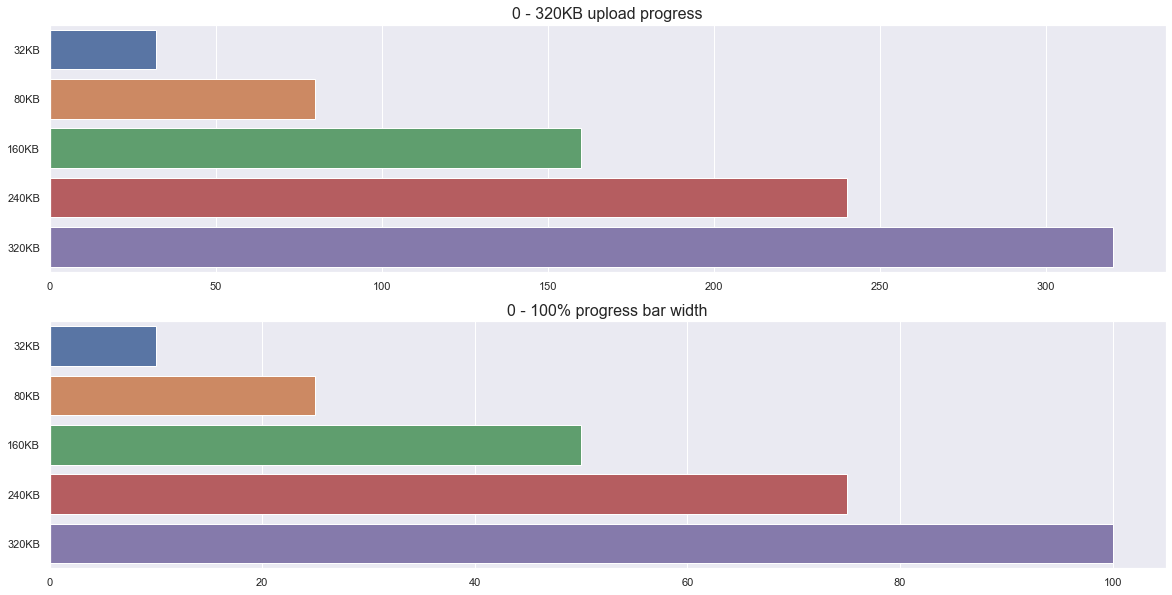

In [5]:
# Here I multiply the normalized data (0 - 1) by 100 so we can have a 0 to 100% scale to simulate
# the width of the progress bar in a application, maybe we could use this to control the width of the bar.
upload_progress_width = upload_progress_normalized * 100


upload_percentiles = [
    np.percentile(upload_progress, percentile) for percentile in [10, 25, 50, 75, 100]
]
width_percentiles = [
    np.percentile(upload_progress_width, percentile)
    for percentile in [10, 25, 50, 75, 100]
]

upload_progress_steps = ["32KB", "80KB", "160KB", "240KB", "320KB"]

upload_progress_data = {
    "size": upload_progress_steps,
    "upload_progress": upload_percentiles,
}

progress_bar_data = {"progress": upload_progress_steps, "bar_width": width_percentiles}

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(20, 10))
ax0.set_title("0 - 320KB upload progress", fontsize=16)
sns.barplot(x="upload_progress", y="size", data=upload_progress_data, ax=ax0)

ax1.set_title("0 - 100% progress bar width", fontsize=16)
sns.barplot(x="bar_width", y="progress", data=progress_bar_data, ax=ax1);


But what if you want to scale to another range other than from 0 to 1? It's also possible with this formula:

$$ x_* = a + \hat{x_i}(b - a) $$


where:

- $ \hat{x_i} $ is the unity-based normalized data that was just calculated (from 0 to 1)
- $ a $ is the minimum value of the new range
- $ b $ is the maximum value of the new range


Let's scale the same original dataset (0 to 320) again, but now the new scale will be from 0 to 1000.

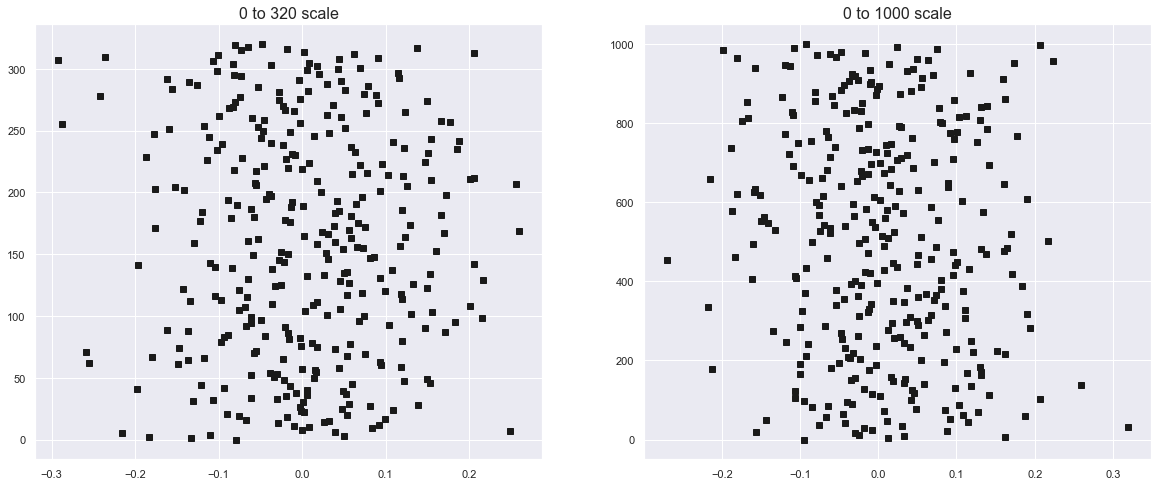

In [7]:
unity_normalized_data = upload_progress_normalized
minimum_value = 0
maximum_value = 1000

new_scale_0_1000 = minimum_value + (
    unity_normalized_data * (maximum_value - minimum_value)
)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 8))
ax0.set_title("0 to 320 scale", fontsize=16)
ax0.plot(0.1 * np.random.randn(321), upload_progress, "ks")
ax1.set_title("0 to 1000 scale", fontsize=16)
ax1.plot(0.1 * np.random.randn(321), new_scale_0_1000, "ks")


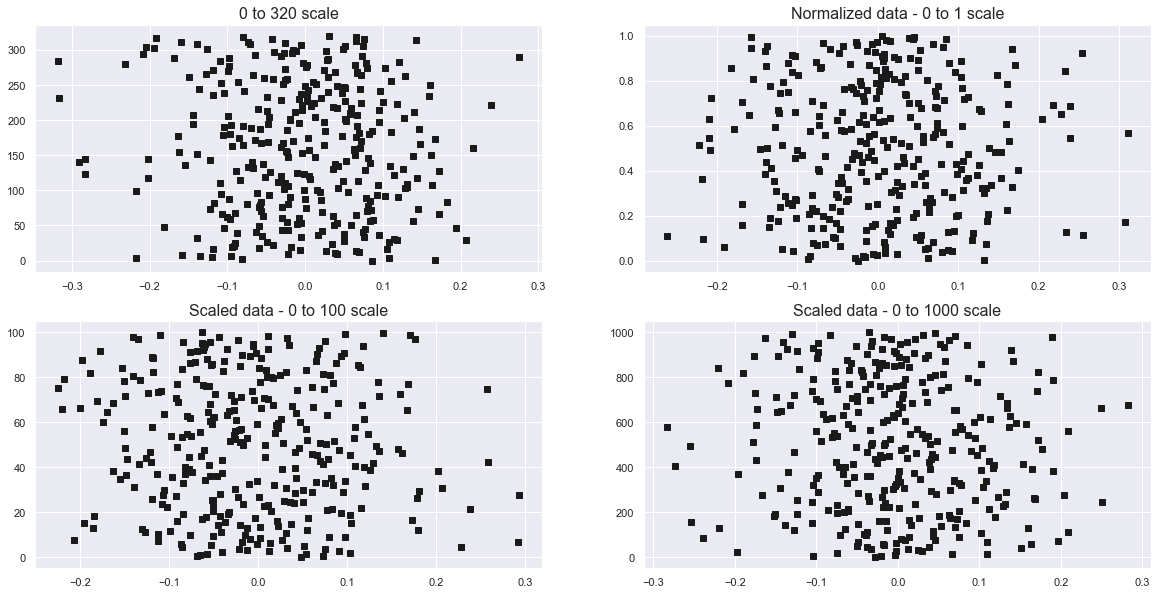

In [10]:
from sklearn.preprocessing import minmax_scale

unity_normalized_data = minmax_scale(upload_progress)
from_0_to_100 = minmax_scale(upload_progress, feature_range=(0, 100))
from_0_to_1000 = minmax_scale(upload_progress, feature_range=(0, 1000))

fig, (ax0, ax1) = plt.subplots(2, 2, figsize=(20, 10))
ax0[0].set_title("0 to 320 scale", fontsize=16)
ax0[0].plot(0.1 * np.random.randn(321), upload_progress, "ks")

ax0[1].set_title("Normalized data - 0 to 1 scale", fontsize=16)
ax0[1].plot(0.1 * np.random.randn(321), unity_normalized_data, "ks")

ax1[0].set_title("Scaled data - 0 to 100 scale", fontsize=16)
ax1[0].plot(0.1 * np.random.randn(321), from_0_to_100, "ks")

ax1[1].set_title("Scaled data - 0 to 1000 scale", fontsize=16)
ax1[1].plot(0.1 * np.random.randn(321), from_0_to_1000, "ks");